In [1]:
!pip install stopwordsiso

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()


In [3]:
from google.colab import drive
import os
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.chdir("./drive/MyDrive/NLP Project/")
path="./splitData"

In [5]:
df_censored=pd.read_pickle(path+"/censored.pickle")

In [6]:
len_censored=len(df_censored)

In [7]:
df_uncensored=pd.read_pickle(path+"/not_censored.pickle")

In [8]:
df_uncensored.head()

,mid,text,created_at,deleted_last_seen,permission_denied,guse
0,mCClUNCqwe,转发微博,2012-01-03 02:02:27,False,False,"[-0.06742318719625473, -0.07985331863164902, -..."
1,mRsOcOLTlc,uK3RXUYW3： u0AGMTTVD： ！！！！！！！！,2012-01-03 01:17:39,False,False,"[-0.00941894855350256, 0.01217515766620636, -0..."
2,mH44qG6iUm,求一切順利,2012-01-03 01:15:36,False,False,"[0.06672303378582001, -0.055423811078071594, -..."
3,mZmwFtOdVX,想要uK3RXUYW3： ukn： 全都想要啊QAQ,2012-01-03 01:12:55,False,False,"[0.006807179655879736, 0.06354787945747375, -0..."
4,mQkLJSl8bf,ukn： uMLLV3ZCO： 转发微博,2012-01-03 01:10:42,False,False,"[-0.020706146955490112, -0.04338109493255615, ..."


In [9]:
df_data=pd.concat([df_censored,df_uncensored])


In [10]:
del df_censored
del df_uncensored
df_data.head()

,mid,text,created_at,deleted_last_seen,permission_denied,guse
0,mkTL1pvXTN,这王某人与中国青年报怎么这么有缘啊。uRLOGZLR4： 原来是个大流氓,2012-01-07 22:29:56,2012-03-03 03:35:43.903155,True,"[0.006624801550060511, 0.031350668519735336, 0..."
1,m5PIm1JzG8,经常看到有代表四处调研，你代表的是哪个行业，就好好调研一下本行业的问题好不好？自己的工作都做...,2012-01-05 09:00:03,2012-01-30 21:36:44.229791,True,"[0.03378220275044441, -0.007479660212993622, 0..."
2,mJGNyWD5fj,刚在宝宝的书架上发现这本书，翻了一下，历史事实描述一派胡言。问宝宝，这本书的内容你们考试吗？...,2012-01-02 12:45:58,False,True,"[0.009367837570607662, -0.03505528345704079, -..."
3,m3e5KqAhFh,应该找uRLOWL0ZX： 去影他相！新年流流揸公车出来行，仲要违章，真是岂有此理！,2012-01-03 18:15:24,2012-01-30 19:15:54.549843,True,"[-0.02759631723165512, -0.009455885738134384, ..."
4,mkTLyULvfH,崔永元：微博春晚节目——天津快板：竹板这么一打啊，啥也不能说，不能说食品，不能说动车，不能说...,2012-01-07 12:02:02,2012-02-28 11:08:24.583212,True,"[0.002411450492218137, 0.025735968723893166, 0..."


In [11]:
from stopwordsiso import stopwords
def stop_word(text):
    stopword = stopwords(["zh"])
    remove_stw = [word for word in str(text).split() if not word in stopword]
    return remove_stw

import re
def remove_english_chars(text):
  text=re.sub(r'[a-zA-Z0-9]', r'', text)
  # text=text.split(" ")
  # text_lst=[w for w in text if not re.match(r'[A-Z a-z 0-9]+', w, re.I)]
  # " ".join(text_lst)
  return text

def preprocess_text(text):
  text= remove_english_chars(text)
  text=stop_word(text)
  return " ".join(text)

In [12]:
# df_data["text"]=df_data["text"].progress_apply(lambda x: preprocess_text(str(x)))

In [13]:
df_data["permission_denied"]=df_data["permission_denied"].astype("bool").astype("int")

In [14]:
df_data.head()

,mid,text,created_at,deleted_last_seen,permission_denied,guse
0,mkTL1pvXTN,这王某人与中国青年报怎么这么有缘啊。uRLOGZLR4： 原来是个大流氓,2012-01-07 22:29:56,2012-03-03 03:35:43.903155,1,"[0.006624801550060511, 0.031350668519735336, 0..."
1,m5PIm1JzG8,经常看到有代表四处调研，你代表的是哪个行业，就好好调研一下本行业的问题好不好？自己的工作都做...,2012-01-05 09:00:03,2012-01-30 21:36:44.229791,1,"[0.03378220275044441, -0.007479660212993622, 0..."
2,mJGNyWD5fj,刚在宝宝的书架上发现这本书，翻了一下，历史事实描述一派胡言。问宝宝，这本书的内容你们考试吗？...,2012-01-02 12:45:58,False,1,"[0.009367837570607662, -0.03505528345704079, -..."
3,m3e5KqAhFh,应该找uRLOWL0ZX： 去影他相！新年流流揸公车出来行，仲要违章，真是岂有此理！,2012-01-03 18:15:24,2012-01-30 19:15:54.549843,1,"[-0.02759631723165512, -0.009455885738134384, ..."
4,mkTLyULvfH,崔永元：微博春晚节目——天津快板：竹板这么一打啊，啥也不能说，不能说食品，不能说动车，不能说...,2012-01-07 12:02:02,2012-02-28 11:08:24.583212,1,"[0.002411450492218137, 0.025735968723893166, 0..."


In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_data, test_size=0.2)

In [16]:
test.head()

,mid,text,created_at,deleted_last_seen,permission_denied,guse
508465,m5ucgxxtxv,二哥骨耐特早点休息噢别太晚了敖夜对身体不好的,2012-01-03 01:04:22,False,0,"[-0.03602730855345726, -0.02276073582470417, 0..."
129466,mc9Dz7R3si,转发微博,2012-10-23 07:20:02,2012-11-13 16:47:29.249792,1,"[-0.06742313504219055, -0.07985328137874603, -..."
133496,mf6pkuPuuE,又搞运动啦！不厚大概在秦城会意了。,2012-11-25 13:08:28,2012-11-28 08:21:26.260108,1,"[-0.056624412536621094, -0.03239184617996216, ..."
9708,meBm0hhV4c,一个拿国家的钱讨好百姓，一个拿酱油壳杀外国间谍！比戏子还戏子！！这样的坏人怎么不多点？？泪伤...,2012-12-18 00:18:44,False,1,"[0.019068412482738495, -0.026148438453674316, ..."
163105,m9IpsSQSU5,这个 来自魔图精灵,2012-01-02 17:18:47,False,0,"[0.02893940731883049, -0.012857943773269653, 0..."


In [17]:
# X=data["tweet"]
# y=data["label"]

In [18]:
#importing required packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [19]:
X_train=train["guse"].to_numpy()
y_train = train["permission_denied"].to_numpy()
y_test = test["permission_denied"].to_numpy()
X_test=test["guse"].to_numpy()


In [20]:
np.save(path+"/X_train_guse.npy",X_train)

In [21]:
# np.load(path+"/X_train.npy",allow_pickle=True)

In [22]:
# X_train

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
import re
import jieba

In [25]:
# count_vectorizer = CountVectorizer(tokenizer=jieba.lcut)
# model_count=count_vectorizer.fit(X_train)

In [26]:

# X_train_count=count_vectorizer.transform(X_train)
# X_test_count=count_vectorizer.transform(X_test)

X_train_count=np.vstack(X_train)
X_test_count=np.vstack(X_test)



In [27]:
del df_data

In [28]:
import gc
 
# Returns the number of
# objects it has collected
# and deallocated
collected = gc.collect()

In [29]:
# count_vectorizer

In [30]:
# a={"model":model_count}

In [31]:

# with open(path+"/count_vectorizer1.pickle", 'wb') as handle:
#     pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:

# # count_vectorizer
# import pickle
# pickle.dump(count_vectorizer, open(path+"/count_vectorizer.pickle", 'wb'))

**Naive Bayes**

In [33]:
#defining model and fitting train data
model = MultinomialNB()
model.fit(X_train_count,y_train)##model traing took place here

ValueError: ignored

In [ ]:
y_predict= model.predict(X_test_count)
y_predict

In [ ]:
#printing confusion matrix
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test,y_predict)
matrix

In [ ]:
#printing accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_count, y_test)  
plt.show()

In [ ]:
import pickle
pickle.dump(model, open(path+"/Naive_Bayes_Model_GUSE.pickle", 'wb'))

**Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
#hyper parameter tuning
#importing gridsearchcv
from sklearn.model_selection import GridSearchCV
#giving parameters of decision tree
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

#calling decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
#applying gridsearchcv for hyper parameter tuning
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
#fitting the data
tree_cv.fit(X_train_count[:1000],y_train[:1000])
#to print the best parameters after hyper parameter tuning
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(X_train_count,y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'random'})


DecisionTreeClassifier(max_depth=3, min_samples_leaf=19, splitter='random')

In [36]:
model_dt=DecisionTreeClassifier(criterion="gini", max_depth= 7, min_samples_leaf= 1, min_samples_split= 4, splitter='best')
model_dt.fit(X_train_count,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=4)

In [37]:
y_predict_dt= model_dt.predict(X_test_count)
y_predict_dt

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import confusion_matrix
matrix_dt= confusion_matrix(y_test,y_predict_dt)
matrix_dt

array([[102394,   4961],
       [ 16012,  10858]])

In [39]:
#printing accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict_dt)

0.8437474390016763

In [40]:
import pickle
pickle.dump(model_dt, open(path+"/DecisionTreeClassifier_GUSE.pickle", 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


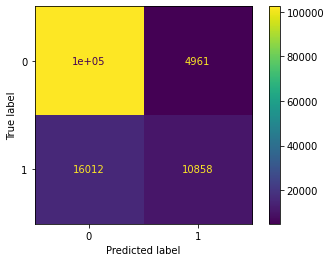

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_dt, X_test_count, y_test)  
plt.show()

**Random forest classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Number of trees in random forest
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid with all parameters defined
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#calling random forest classifier
rand_clf = RandomForestClassifier(random_state=42)
#applying randomised search cv for hyper parameter tuning
rand_cv = RandomizedSearchCV(rand_clf, random_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
#fitting train data using randomised search cv
rand_cv.fit(X_train_count[:1000],y_train[:1000])
#to print best parameters after hyper parameter tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   scoring='accuracy', verbose=1)

In [43]:
best_params =rand_cv.best_params_
print(f"Best paramters: {best_params})")

Best paramters: {'n_estimators': 1155, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [44]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators= 1577, min_samples_split= 2, min_samples_leaf= 4, max_features='auto', max_depth= 110, bootstrap=True)
model_rf.fit(X_train_count,y_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, n_estimators=1577)

In [45]:
y_predict_rf= model_rf.predict(X_test_count)
y_predict_rf

array([0, 0, 1, ..., 1, 0, 0])

In [46]:
from sklearn.metrics import confusion_matrix
matrix_rf= confusion_matrix(y_test,y_predict_rf)
matrix_rf

array([[105674,   1681],
       [  9636,  17234]])

In [47]:
#printing accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict_rf)

0.9156863475507543

In [ ]:
import pickle
pickle.dump(model_rf, open(path+"/RandomForestClassifier_GUSE.pickle", 'wb'))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_rf, X_test_count, y_test)  
plt.show()

**svm**

In [33]:
from sklearn.svm import LinearSVC, SVC


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.5,0.8,1.0]
}
svm = LinearSVC()
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train_count,y_train)
print("Best Parameters of liner kernal :", svm_cv.best_params_)

Best Parameters of liner kernal : {'C': 0.8}


In [ ]:
linear_svc_model = LinearSVC(C=0.8)
linear_svc_model.fit(X_train_count,y_train)

In [ ]:
y_predict_svm= linear_svc_model.predict(X_test_count)
y_predict_svm

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_svm= confusion_matrix(y_test,y_predict_svm)
matrix_svm

In [ ]:
#printing accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict_svm)

In [ ]:
import pickle
pickle.dump(linear_svc_model, open(path+"/linear_svc_model_Model_GUSE.pickle", 'wb'))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(linear_svc_model, X_test_count, y_test)  
plt.show()